In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries loaded")

path = "C:/Users/sergi/Desktop/Pollution/Pollution.csv"

#download url: https://analisi.transparenciacatalunya.cat/Medi-Ambient/Dades-d-immissi-dels-punts-de-mesurament-de-la-Xar/uy6k-2s8r

# Loading database
Database = pd.read_csv(path)

# Once the database is loaded, let's get some insights about structure, data types, features and size
print(Database.keys())
print("Database size:",Database.shape)
# H + nº / V + nº = Hour values and validation
# Some of the elements are irrelevant and are extracted from other features, we'll take care from them afterwards.

Libraries loaded


c:\users\sergi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9,11,15,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['CODI MESURAMENT', 'CODI EOI', 'PROVINCIA', 'CODI MUNICIPI',
       'CODI ESTACIÓ', 'NOM ESTACIÓ', 'MUNICIPI', 'LATITUD', 'LONGITUD',
       'ALTITUD', 'TIPUS ESTACIÓ', 'ÀREA URBANA', 'MAGNITUD', 'CONTAMINANT',
       'UNITATS', 'PUNT MOSTREIG', 'ANY', 'MES', 'DIA', 'DATA', 'H01', 'V01',
       'H02', 'V02', 'H03', 'V03', 'H04', 'V04', 'H05', 'V05', 'H06', 'V06',
       'H07', 'V07', 'H08', 'V08', 'H09', 'V09', 'H10', 'V10', 'H11', 'V11',
       'H12', 'V12', 'H13', 'V13', 'H14', 'V14', 'H15', 'V15', 'H16', 'V16',
       'H17', 'V17', 'H18', 'V18', 'H19', 'V19', 'H20', 'V20', 'H21', 'V21',
       'H22', 'V22', 'H23', 'V23', 'H24', 'V24', 'Georeferència',
       'LIMADM_MUNICIPI', 'LIMADM COMARCA'],
      dtype='object')
Database size: (5487712, 71)


In [552]:
# To understand how are the stations distributed, let's visualize locations using coordinates.

# 1- Get stations names
stationListNames = list(Database["NOM ESTACIÓ"].unique())

# 2- Get the corresponding features for this procedure
stationDataBase = Database[["NOM ESTACIÓ","LATITUD","LONGITUD", "ALTITUD"]]
stationDataBase

,NOM ESTACIÓ,LATITUD,LONGITUD,ALTITUD
0,Berga,42.097902,1.848201,661
1,Badalona,41.443985,2.237899,7
2,Cubelles (Poliesportiu),41.202197,1.672200,5
3,Badalona,41.443985,2.237899,7
4,Badalona,41.443985,2.237899,7
...,...,...,...,...
5487707,Sta Perpetua de Mogoda,41.526720,2.183800,84
5487708,Montsec,42.051321,7.295987,157
5487709,Palleja (Roca de Vilana),41.415280,1.990501,82
5487710,Montseny (La Castanya),41.779280,2.358002,693


In [553]:
# There are a few stations duplicated due to accents, it's necessary to clean them, sorting previously.

stationDataBase.sort_values("NOM ESTACIÓ", inplace = True) 
  
# dropping ALL duplicte values 
stationDataBase.drop_duplicates(subset ="NOM ESTACIÓ", inplace = True) 
  
# displaying data 
stationDataBase 

c:\users\sergi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\sergi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NOM ESTACIÓ,LATITUD,LONGITUD,ALTITUD
2786217,Agullana,42.392001,2.842100,214
1790344,Alcanar,40.552807,5.300003,7
2228962,Alcover,45.261660,1.166943,243
599344,Ametlla de Mar,40.902483,0.809721,34
632835,Amposta,40.706703,0.581701,8
...,...,...,...,...
4693839,el Prat de Llobregat (església),41.331399,2.092499,5
2707391,la Nou de Berguedà (Malanyeu),42.195534,1.891947,850
2127507,la Pobla de M./el Morell,41.188618,1.209164,98
3422881,la Sénia,40.633078,2.797220,396


In [554]:
# First step: discart null values
stationDataBase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 2786217 to 7855
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOM ESTACIÓ  150 non-null    object 
 1   LATITUD      151 non-null    float64
 2   LONGITUD     151 non-null    float64
 3   ALTITUD      151 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


In [555]:
# Using .info() we can see now there's a row with a null value. Dropping it will allow us to graph locations and altitudes
stationDataBase = stationDataBase[stationDataBase['NOM ESTACIÓ'].notna()]
stationDataBase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 2786217 to 3422881
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOM ESTACIÓ  150 non-null    object 
 1   LATITUD      150 non-null    float64
 2   LONGITUD     150 non-null    float64
 3   ALTITUD      150 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


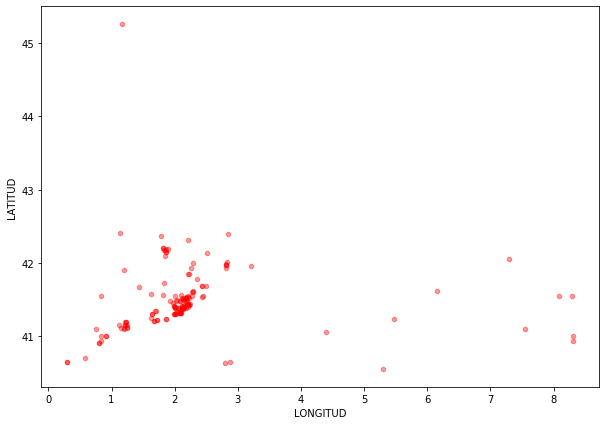

In [556]:
stationDataBase.plot(kind = "scatter", x = "LONGITUD", y = "LATITUD",c='r', alpha = 0.4, figsize = (10,7))

Original size: (150, 4)
(149, 4)
Final size: (139, 4)


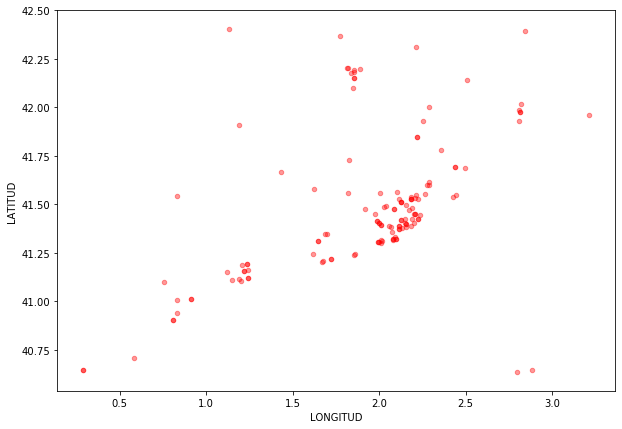

In [557]:
'''
There are some stations with wrong coordinates, such as Alcanar (40.55 and 5.3 are located into the Mediterranean sea).
Catalan coast is fairly well defined, with Barcelona as its center. Let's have the following approach:
- Defining the proper boundaries, catalan geography is fairly well defined, so every center outside our square boundary has to
be erased or modified.
- This acceptance square is: 40 < latitud < 43 and 0 < longitud < 3.5
'''
print("Original size:", stationDataBase.shape)
# First boundary (latitude > 40) & (latitude < 43)
stationDataBase = stationDataBase[(stationDataBase['LATITUD'] > 40.5) & (stationDataBase['LATITUD'] < 43)]  

# Checking new shape 
print(stationDataBase.shape)

# Third boundary (longitude < 3 ) -- We're assuming all latitude data is correctly defined as positive in this case.
stationDataBase = stationDataBase[stationDataBase['LONGITUD'] < 3.5]  

# Checking final shape 
print("Final size:",stationDataBase.shape)


stationDataBase.plot(kind = "scatter", x = "LONGITUD", y = "LATITUD", c="r", alpha = 0.4, figsize = (10,7))

In [558]:
# Droping those outbounded stations
stationDataBase.drop(stationDataBase[(stationDataBase['LATITUD'] < 41) & (stationDataBase['LONGITUD'] >2.5 )].index, 
                     axis=0, inplace=True)

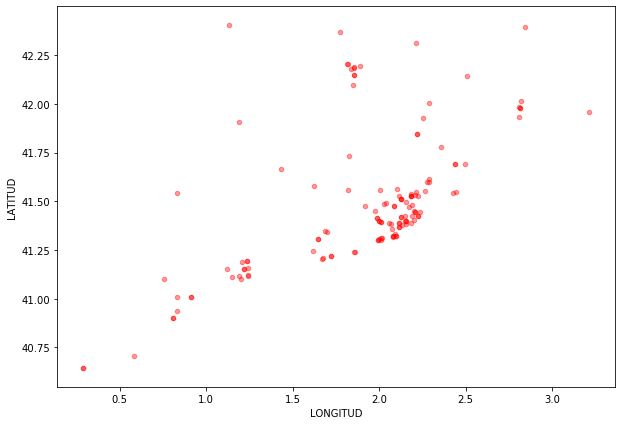

In [559]:
stationDataBase.plot(kind = "scatter", x = "LONGITUD", y = "LATITUD", c="r", alpha = 0.4, figsize = (10,7))

In [560]:
'''
Here we have it! This plot shows us where are the stations located. For practicing this exercice, we'll do as approach:
- Analyze a random station from Barcelona city (has the most of stations) and compare it from the last year (2019) to this,
and see how Covid affected to pollution.

Although this time we'll just analyze Barcelona station, we'll filter out different stations (by region) for further analysis 
or compare it with Barcelona.
'''

bcnStations = stationDataBase[stationDataBase["NOM ESTACIÓ"].str.contains("Barcelona")] 
gironaStations = stationDataBase[stationDataBase["NOM ESTACIÓ"].str.contains("Girona")]
berguedaStations = stationDataBase[(stationDataBase["LATITUD"] > 42) & (stationDataBase["LATITUD"] < 42.25)&
                               (stationDataBase["LONGITUD"] > 1.5) & (stationDataBase["LONGITUD"] < 2) ]
pyrineesStations = stationDataBase[stationDataBase["LATITUD"] > 42.25]

bcnStations

,NOM ESTACIÓ,LATITUD,LONGITUD,ALTITUD
985434,Barcelona (Ciutadella),41.386403,2.187398,7
2949465,Barcelona (Eixample),41.385314,2.153800,26
3529692,Barcelona (Gracia - Sant Gervasi),41.398722,2.153399,57
1153982,Barcelona (Gràcia - Sant Gervasi),41.398724,2.153399,57
480758,Barcelona (Observatori Fabra),41.418431,2.123897,415
43321,Barcelona (Palau Reial),41.387492,2.115200,81
4671383,Barcelona (Parc Vall Hebron),41.426109,2.148002,136
1808143,Barcelona (Poblenou),41.403878,2.204501,3
3284483,Barcelona (Sagrera),41.422213,2.190555,12
3256945,Barcelona (Sants),41.378783,2.133099,35


In [561]:
'''
Now we've filtered regions for analyze performance we'll have a look in order to end up with the correct stations
some are repeated but written differently
'''
# Barcelona has a single station duplicated (gràcia - Sant Gervasi)
bcnStations = bcnStations.drop([bcnStations.index[3]])

# Girona also has duplicated stations and some other directions with "girona" in the name from other places
for i in range(0,3):
    gironaStations = gironaStations.drop([gironaStations.index[0]]) # Erase 3 times the first element

# Berguedà needs to filter the elements nº1 and 2 as long as both are duplicate
for i in range(0,2):
    berguedaStations = berguedaStations.drop([berguedaStations.index[1]])

In [612]:
'''
Station lists are all clean. Now it's time to find out all the data from that stations in order to analyze the data in there.
'''
import random

bcnStationAnalyze = bcnStations.iloc[random.randint(0, bcnStations.shape[0])]["NOM ESTACIÓ"]

'''
gironaStationAnalyze = gironaStations.iloc[random.randint(0, gironaStations.shape[0])]["NOM ESTACIÓ"]
berguedaStationAnalyze = berguedaStations.iloc[random.randint(0, berguedaStations.shape[0])]["NOM ESTACIÓ"]
pyrineesStationAnalyze = pyrineesStations.iloc[random.randint(0, pyrineesStations.shape[0])]["NOM ESTACIÓ"]
'''
bcnStationAnalyze

'Barcelona (Parc Vall Hebron)'

In [613]:
# Time to get all the information from this selected station
bcnStationData = Database[Database["NOM ESTACIÓ"] == bcnStationAnalyze]

'''
gironaStationData = Database[Database["NOM ESTACIÓ"] == gironaStationAnalyze]
berguedaStationData = Database[Database["NOM ESTACIÓ"] == berguedaStationAnalyze]
pyrineesStationData = Database[Database["NOM ESTACIÓ"] == pyrineesStationAnalyze]
'''

'\ngironaStationData = Database[Database["NOM ESTACIÓ"] == gironaStationAnalyze]\nberguedaStationData = Database[Database["NOM ESTACIÓ"] == berguedaStationAnalyze]\npyrineesStationData = Database[Database["NOM ESTACIÓ"] == pyrineesStationAnalyze]\n'

In [614]:
# As previously, we need to filter those features which are irrelevant for our interest in this case, we'll maintain:
features = ['NOM ESTACIÓ', 'MUNICIPI', 'ALTITUD', 'MAGNITUD', 'CONTAMINANT',
       'UNITATS', 'ANY', 'MES', 'DIA', 'DATA', 'H01','H02','H03','H04','H05',
       'H06','H07','H08','H09','H10','H11','H12','H13','H14','H15','H16',
       'H17','H18','H19','H20','H21','H22','H23','H24']

bcnData = bcnStationData[features]

'''
gironaData = gironaStationData[features]
berguedaData = berguedaStationData[features]
pyrineesData = pyrineesStationData[features]
'''

'\ngironaData = gironaStationData[features]\nberguedaData = berguedaStationData[features]\npyrineesData = pyrineesStationData[features]\n'

In [615]:
# There are many different air pollutants, we'll have to spread all of them in different partial datasets
pollutants = bcnData["CONTAMINANT"].unique()

In [616]:
pollutants

array(['PM10', 'NOX', 'O3', 'SO2', 'CO', 'NO', 'NO2', 'PS'], dtype=object)

In [617]:
# Generate datasets 
# pollutants and bcnPollutList are idenxed paralelly we can create a dictionari where each pollutant is stored
bcnDictionary = {}
gironaDictionary = {}
berguedaDictionary = {}
pyrineesDictionary = {}

for i in range(0, len(pollutants)):
    bcnDictionary["bcn"+pollutants[i]] = bcnData[bcnData["CONTAMINANT"] == pollutants[i]]
    '''
    gironaDictionary["girona"+pollutants[i]] = gironaData[gironaData["CONTAMINANT"] == pollutants[i]]
    berguedaDictionary["bergueda"+pollutants[i]] = berguedaData[berguedaData["CONTAMINANT"] == pollutants[i]]
    pyrineesDictionary["pyrinees"+pollutants[i]] = pyrineesData[pyrineesData["CONTAMINANT"] == pollutants[i]]
    '''

In [618]:
'''
Actually we have all the data stored, grouped by pollutant allowing us to analyze it independently and compare them.
'''
print(bcnDictionary["bcnPM10"].keys())

Index(['NOM ESTACIÓ', 'MUNICIPI', 'ALTITUD', 'MAGNITUD', 'CONTAMINANT',
       'UNITATS', 'ANY', 'MES', 'DIA', 'DATA', 'H01', 'H02', 'H03', 'H04',
       'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14',
       'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24'],
      dtype='object')


In [619]:
'''
It's necessary to clean up the data again, dropping the NaN values.
'''
bcnDictionary["bcnPM10"] = bcnDictionary["bcnPM10"].dropna(axis = 0, how ='any')
print("New size:",bcnDictionary["bcnPM10"].shape)
bcnDictionary["bcnPM10"]

New size: (1503, 34)


,NOM ESTACIÓ,MUNICIPI,ALTITUD,MAGNITUD,CONTAMINANT,UNITATS,ANY,MES,DIA,DATA,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
605,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2019,12,21,21/12/2019,...,14,18,13,14,8,14,9,12,29,11
606,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2019,12,22,22/12/2019,...,14,6,9,15,13,12,9,8,3,3
607,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2019,12,23,23/12/2019,...,10,9,12,10,7,14,23,21,22,13
608,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2019,12,24,24/12/2019,...,14,12,9,12,12,13,10,11,10,9
609,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2019,12,25,25/12/2019,...,11,18,13,15,12,9,8,5,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481471,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2016,1,17,17/01/2016,...,16,18,17,19,21,33,50,33,19,20
5481525,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2016,1,10,10/01/2016,...,40,28,30,31,39,37,11,17,32,25
5481714,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2016,10,8,08/10/2016,...,29,21,17,25,23,24,24,24,21,21
5481820,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2016,7,8,08/07/2016,...,29,27,25,25,24,22,23,26,27,32


In [620]:
'''
Sort the cleaned data by year-month-day. Once it's sorted, extract measurements and graphic them.
'''
bcnDictionary["bcnPM10"].sort_values(["ANY", "MES", "DIA"], inplace = True) 
bcnDictionary["bcnPM10"]

,NOM ESTACIÓ,MUNICIPI,ALTITUD,MAGNITUD,CONTAMINANT,UNITATS,ANY,MES,DIA,DATA,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
5316566,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2015,10,3,03/10/2015,...,24,22,17,18,20,20,21,27,26,22
5305657,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2015,10,4,04/10/2015,...,19,30,38,28,19,21,22,24,22,20
5322465,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2015,10,5,05/10/2015,...,41,41,35,26,31,47,44,41,33,32
5325029,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2015,10,8,08/10/2015,...,18,15,14,18,12,14,16,16,18,14
5312220,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2015,10,9,09/10/2015,...,26,28,32,30,31,29,24,11,25,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32967,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2020,5,11,11/05/2020,...,8,7,7,7,13,11,17,11,15,9
154773,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2020,5,14,14/05/2020,...,10,11,12,10,8,7,6,6,6,9
155224,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2020,5,15,15/05/2020,...,8,9,7,7,6,7,9,9,9,11
155225,Barcelona (Parc Vall Hebron),Barcelona,136,10,PM10,µg/m3,2020,5,16,16/05/2020,...,9,8,4,5,5,3,5,6,6,4


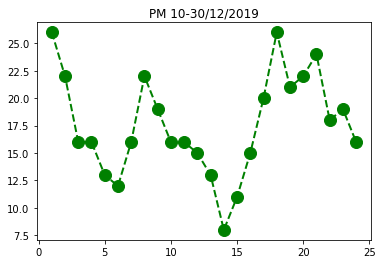

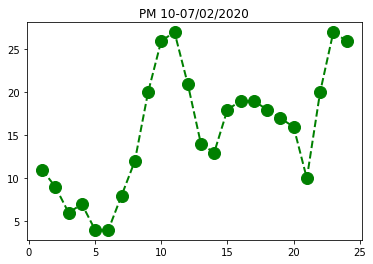

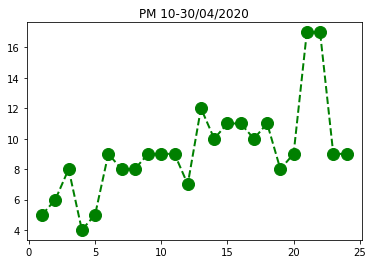

In [621]:
'''
In order to visualize graphically, we could have different approaches:
- Graph same hour but through the time, containing date in X axis.
- Graph all day long, date will just be the "title".

This time, we'll use all day evolution approach in order to visualize how does the pollutant evolve during the day.
As long as 3108 are too much graphs, we'll just select days between 2019 and 2020 to visualize the impact of Covid in the PM10
pollutant.
'''
import random
import matplotlib.pyplot as plt
# 1st Approach

# Create X axis (hours)
hours = np.arange(1,25)

# Visualize 3 random days from the last measurements
for i in range(0,3):
    randomGraph = random.randint(bcnDictionary["bcnPM10"].shape[0]-200,bcnDictionary["bcnPM10"].shape[0])
    # Store the corresponding data(H features), index 9 i date, index 10 is the first one with measurements 
    values = []
    for i in hours:
        values.append(bcnDictionary["bcnPM10"].iloc[randomGraph][i+9]) # 9 is the bias for selecting just the data

    # Now with both elements we can graph it
    plt.plot(hours, values, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
    plt.title("PM 10-" + bcnDictionary["bcnPM10"].iloc[randomGraph][9])
    plt.show()

In [665]:
# Filter march measurements for compare purposes.
april2019 = bcnDictionary["bcnPM10"][(bcnDictionary["bcnPM10"]["ANY"] == 2019) & (bcnDictionary["bcnPM10"]["MES"] ==4)]
april2020 = bcnDictionary["bcnPM10"][(bcnDictionary["bcnPM10"]["ANY"] == 2020) & (bcnDictionary["bcnPM10"]["MES"] ==4)]


In [666]:
'''
There are some days duplicated. Let's just erase those repeated.
'''
april2019.drop_duplicates(subset ="DATA", inplace = True) 
april2020.drop_duplicates(subset = "DATA", inplace = True)


c:\users\sergi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\sergi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


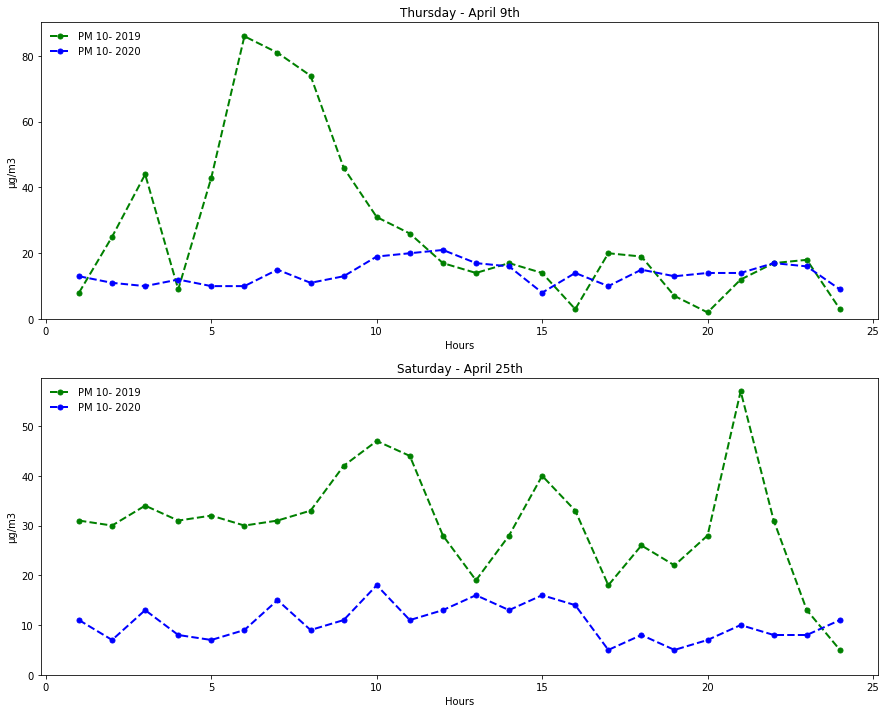

In [732]:
'''
As long as we just want to visualize measurements, the remaining information is irrelevant, for increase performance we'll
erase the data from the rest of features maintaining just measurements.
'''
dataFeatures = ['H01','H02','H03','H04','H05',
       'H06','H07','H08','H09','H10','H11','H12','H13','H14','H15','H16',
       'H17','H18','H19','H20','H21','H22','H23','H24']

# Select days 
d1A19 = april2019[april2019["DIA"] == 9]
d1A20 = april2020[april2020["DIA"] == 9]
d2A19 = april2019[april2019["DIA"] == 25]
d2A20 = april2020[april2020["DIA"] == 25]


# Days are selected, let's just select the subdataset to englobe the measurements
d1A19 = d1A19[dataFeatures].iloc[0]
d1A20 = d1A20[dataFeatures].iloc[0]
d2A19 = d2A19[dataFeatures].iloc[0]
d2A20 = d2A20[dataFeatures].iloc[0]


# Create X axis, in some cases, due to NaN values, might have different lenghts.
april2019X = np.arange(1, len(april2019))
april2020X = np.arange(1, len(april2020))


# Visualize the results in a multiple plot
plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.plot(hours, d1A19, color='green', marker='o', linestyle='dashed',label="PM 10- 2019", linewidth=2, markersize=5)
plt.plot(hours, d1A20, color='blue', marker='o', linestyle='dashed',label="PM 10- 2020", linewidth=2, markersize=5)
plt.ylim(ymin = 0)
plt.xlabel("Hours", fontsize= 10)
plt.ylabel("µg/m3", fontsize = 10)
plt.title("Thursday - April 9th")

leg = plt.legend();
plt.legend(loc='upper left', frameon=False)

plt.subplot(212)
plt.plot(hours, d2A19, color='green', marker='o', linestyle='dashed',label="PM 10 - 2019", linewidth=2, markersize=5)
plt.plot(hours, d2A20, color='blue', marker='o', linestyle='dashed',label="PM 10 - 2020", linewidth=2, markersize=5)
plt.ylim(ymin = 0)
plt.xlabel("Hours", fontsize= 10)
plt.ylabel("µg/m3", fontsize = 10)
plt.title("Saturday - April 25th")

leg = plt.legend();
plt.legend(loc='upper left', frameon=False)

In [743]:
'''
In this case, the station is located closely to one of the most densed roads of Barcelona (Ronda de Dalt), the difference between
is large. In order to measure, we'll apply the "integration under the curve" in order to quantify the decrease.
'''
d1A19Int = 0
d1A20Int = 0
d2A19Int = 0
d2A20Int = 0

for valueH in d1A19:
    d1A19Int = d1A19Int+float(valueH)
    
for valueH in d1A20:
    d1A20Int = d1A20Int+float(valueH)
    
for valueH in d2A19:
    d2A19Int = d2A19Int+float(valueH)
    
for valueH in d2A20:
    d2A20Int = d2A20Int+float(valueH)

'''
Time to compare values.
'''
print("2019 - April 9th - ", d1A19Int)
print("2020 - April 9th - ", d1A20Int)
print("Reduction:",round(100*(d1A20Int/d1A19Int), 2), "%")

print("2019 - April 25th - ", d2A19Int)
print("2020 - April 25th - ", d2A20Int)
print("Reduction:",round(100*(d2A20Int/d2A19Int),2), "%")

2019 - April 9th -  636.0
2020 - April 9th -  328.0
Reduction: 51.57 %
2019 - April 25th -  733.0
2020 - April 25th -  253.0
Reduction: 34.52 %


In [ ]:
'''
The difference is notorious, mostly because within this April, mostly because Ronda de Dalt is the most densed road from Barcelona
by far (about 160000 vehicles each day, sources: https://www.bcn.cat/estadistica/catala/dades/anuari/cap15/C1511010.htm) and
due to lockdown, the traffic reduced a lot.

For further analysis we could work with the rest of the pollutants, or compare this same station with other stations arround 
the territory, (such as those we filtered previously), or could analyze pollutant behavior in different stations arround the city.
'''